# Finding The Closest Pair Algorithm

Given a list of points (Euclidean coordinates) in plane, we are searching for two point
whose distance (Euclidean distance) is the smallest among all pairs of points.
Again we use the divide and conquer strategy to solve this problem.
Inspired by (one dimensional case) the closest points on a straight line, which is immediately solvable
by sorting them with respect to their distance from a point (say origin), we first sort the points w.r.t x-coordinate.

We skip the sorting part of the algorithm and simply use python built-in function sorted().

To be clear, we display first steps of the algorithm in several plots.

In [7]:
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import math

In [2]:
# The Euclidean distance between two pints in the plane
def dist(a, b):
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

In [14]:
# The following function receives a list of points and displays it on a plot
def show_points(points_list, s=80, c="blue", alpha=0.25):
    points = np.array(points_list)
    plt.scatter(points[:,0], points[:,1], s=s, c=c, alpha=alpha)
    plt.xlabel("x")
    plt.ylabel("y")

In [45]:
def closest_pair_base_case(points_list):
    if len(points_list) == 2:
        return points_list[0], points_list[1]
    elif len(points_list) == 3:
        a = dist(points_list[0], points_list[1])
        b = dist(points_list[1], points_list[2])
        c = dist(points_list[2], points_list[0])
        if a <= b and a <= c:
            return points_list[0], points_list[1]
        elif b <= a and b <= c:
            return points_list[1], points_list[2]
        else:
            return points_list[2], points_list[0]
    

In [89]:
# The recursive function finding the closest pair
def closest_pairs(points_list):
    # Base case
    if len(points_list) <= 3:
        closest = closest_pair_base_case(points_list)
        min_dist = dist(closest[0], closest[1])
        return closest

    # sorting w.r.t x-coordinate
    sorted_list = sorted(points_list, key=lambda point: point[0])
    # DIVIDE: dividing the list in two parts
    mid_len = int(len(sorted_list) / 2)
    X = sorted_list[:mid_len]
    Y = sorted_list[mid_len:]
    # CONQUER: finding the closest pairs in X and Y separately
    (p1, p2) = closest_pairs(X)
    (q1, q2) = closest_pairs(Y)
    d_X = dist(p1, p2)
    d_Y = dist(q1, q2)
    
    # Finding the closest pair in each subset X and Y and compairing to eachother
    closest = (p1, p2)
    d = d_X
    
    if d_X > d_Y:
        closest = (q1, q2)
        d = d_Y

    min_dist = d
    # finding split closest pairs
    x0 = X[-1][0]
    strip = [(p, q) for (p, q) in sorted_list if p<=x0+d and p>=x0-d]
    strip_sorted = sorted(strip, key=lambda point: point[1])
    # print("Strip: ", strip_sorted)
    for i in range(len(strip_sorted)):
        for j in range(1, 8):
            if i+j<len(strip_sorted) and dist(strip_sorted[i], strip_sorted[i+j]) < min_dist:
                min_dist = dist(strip_sorted[i], strip_sorted[i+j])
                closest = (strip_sorted[i], strip_sorted[i+j])
    
    
    return closest


[(40, 108), (164, 240), (213, 399), (437, 311), (18, 278), (80, 177), (74, 50), (90, 448), (439, 275), (487, 28), (440, 98), (199, 268), (384, 144), (426, 105), (471, 194), (489, 485), (135, 309), (111, 485), (326, 452), (143, 380), (97, 117), (397, 475), (282, 175), (42, 131), (115, 65), (417, 420), (311, 407), (437, 436), (209, 397), (283, 497), (268, 447), (452, 379), (112, 399), (197, 165), (299, 275), (393, 207), (437, 156), (180, 107), (137, 272), (61, 449), (465, 342), (162, 185), (261, 131), (259, 19), (334, 58), (357, 476), (444, 34), (122, 347), (387, 393), (210, 76), (415, 92), (158, 107), (459, 410), (144, 464), (24, 148), (250, 412), (94, 251), (309, 192), (31, 105), (492, 35), (480, 370), (146, 453), (207, 398), (350, 266), (108, 199), (391, 181), (468, 424), (376, 326), (105, 153), (452, 186), (186, 273), (59, 235), (188, 221), (403, 469), (329, 109), (382, 294), (386, 253), (388, 205), (98, 465), (155, 243), (266, 183), (73, 435), (239, 78), (272, 44), (61, 343), (39, 8

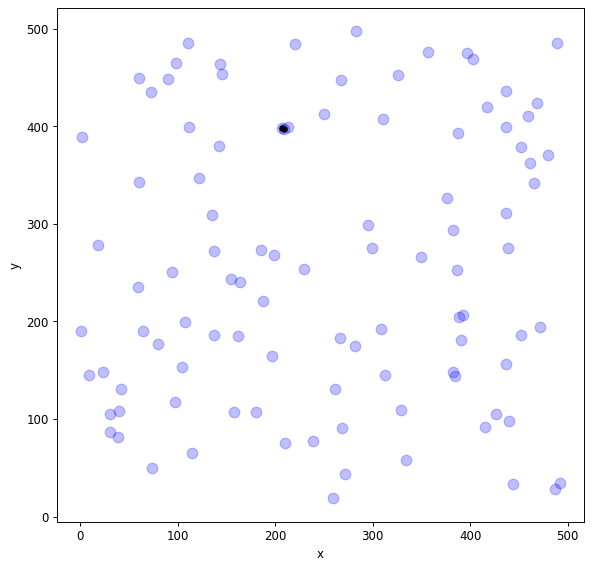

In [99]:
points_list = []
for i in range(0,100):
    p = random.randint(1,500)
    q = random.randint(1,500)
    points_list.append((p, q))
print(points_list)
print("closest pair: ", closest, "      with the distance: ", dist(closest[0], closest[1]))
#finding the closest pair
closest = list(closest_pairs(points_list))
# Scatter plot of the points
figure(figsize=(8, 8), dpi=85)
show_points(points_list)
show_points(closest, s=20, c="black", alpha=1.0)